In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
flags = tf.app.flags
FLAGS = flags.FLAGS


%matplotlib inline
import matplotlib.pyplot as plt

#from IPython.display import Image
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

def image_show(image_path):
  imshow(np.asarray(Image.open(image_path, 'r')))
  plt.show()

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:50000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [ ]:
import sys, os
from deepiu.util.text_predictor import TextPredictor
from deepiu.util.sim_predictor import SimPredictor
from deepiu.util import text2ids
import melt, gezi
import numpy as np 
import traceback

try:
  import conf
  from conf import TEXT_MAX_WORDS
except Exception:
  from deepiu.image_caption.conf import TEXT_MAX_WORDS

image_dir = '/home/gezi/data2/data/ai_challenger/image_caption/pic/'
image_file = '6275b5349168ac3fab6a493c509301d023cf39d3.jpg'

image_model_checkpoint_path = '/home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt'

#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil.baseline'
#model_dir = '/home/gezi/new/temp/image-caption/ai-challenger/model.v4/mil/epoch/model.ckpt-30.00-24600'
model_dir = '/home/gezi/mount/temp/image-caption/ai-challenger/model.v5/mil.max/epoch/'
vocab_path = '/home/gezi/mount/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt'
valid_dir = '/home/gezi/mount/temp/image-caption/ai-challenger/tfrecord/seq-basic/valid'


image_model_name = melt.get_imagenet_from_checkpoint(image_model_checkpoint_path).name
image_model = None
if not melt.varname_in_checkpoint(image_model_name, model_dir):
  image_model = melt.image.ImageModel(image_model_checkpoint_path, 
                                      feature_name='attention')
  
    
print('image_model:', image_model)

text2ids.init(vocab_path)
vocab = text2ids.vocab

predictor = SimPredictor(model_dir,  
                         image_model=image_model,
                         index=-1)

text_strs = np.load(os.path.join(valid_dir, 'distinct_text_strs.npy'))
img2text = np.load(os.path.join(valid_dir, 'img2text.npy')).item()

tensorflow_version: 1.4.0


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


checkpoint /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt model_name InceptionResnetV2 height 299 width 299
build graph for final one feature
preprocessing_fn net_name inception_resnet_v2 height 299 width 299


INFO:tensorflow:Scale of 0 disables regularizer.
INFO:tensorflow:Scale of 0 disables regularizer.


image_feature: Tensor("Flatten/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
build graph for attention features
preprocessing_fn net_name inception_resnet_v2 height 299 width 299
image_feature: Tensor("Flatten_1/flatten/Reshape:0", shape=(?, 98304), dtype=float32)
in create_image_model_init_fn image_model_name InceptionResnetV2 moving_average_decay None


INFO:tensorflow:Restoring parameters from /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt
image_model: <melt.image.image_model.ImageModel object at 0x7f716d0307d0>
INFO:tensorflow:Initializing vocabulary from file: /home/gezi/mount/temp/image-caption/ai-challenger/tfrecord/seq-basic/vocab.txt
INFO:tensorflow:Created vocabulary with 10148 words


restore image var from InceptionResnetV2 /home/gezi/data/image_model_check_point/inception_resnet_v2_2016_08_30.ckpt duration: 6.73053216934
ENCODE_UNK 1
load frozen graph from /home/gezi/mount/temp/image-caption/ai-challenger/model.v5/mil.max/epoch/model.ckpt-10.00-8200.pb with mapfile /home/gezi/mount/temp/image-caption/ai-challenger/model.v5/mil.max/epoch/model.ckpt-10.00-8200.map duration: 3.52016091347


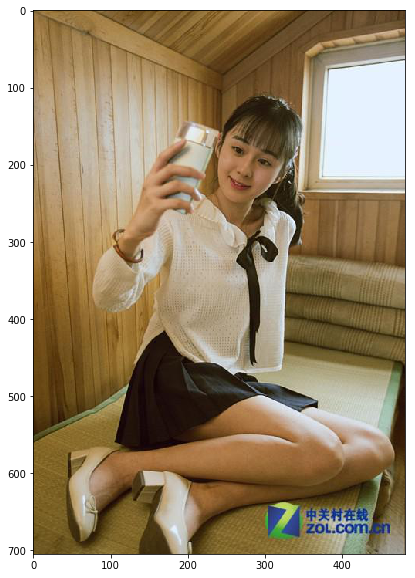

topwords of image  42195bece99b2263aefa8a1fcbc11aa684e4fdf0.jpg
0 衣服 0.552524|1 和 0.541574|2 抱 0.540822|3 沙发 0.536431|4 椅子 0.531468|5 腿 0.529181|6 孩子 0.526281|7 眼镜 0.511899|8 桌子 0.504519|9 床上 0.498781|10 扎 0.491094|11 搭 0.482227|12 背着 0.48181|13 披 0.467314|14 大厅 0.465889|15 抬起 0.46078|16 女孩 0.459465|17 舞台 0.445815|18 裙子 0.440853|19 地上 0.436828|20 墙边 0.431002|21 房屋内 0.42938|22 给 0.429136|23 连衣裙 0.42553|24 看 0.42335|25 交叉 0.421491|26 整洁 0.418413|27 躺 0.415679|28 球衣 0.411388|29 杯子 0.40776|30 外套 0.402323|31 道路 0.396795|32 靠 0.391171|33 短裤 0.390331|34 外 0.382637|35 护栏 0.381756|36 短裙 0.381751|37 房间内 0.379342|38 凳子 0.378691|39 搂 0.377534|40 休闲 0.375796|41 发型 0.370447|42 红色 0.366366|43 灰色 0.365163|44 托着 0.364387|45 房子 0.363298|46 草地 0.359826|47 抬着 0.352924|48 插 0.35244|49 台子上 0.349185|50 跪 0.348162|51 饲养 0.342319|52 地板 0.342257|53 胡 0.339851|54 摸 0.339223|55 栏杆 0.336907|56 广告牌 0.335376|57 行走 0.332423|58 床边 0.331906|59 走廊 0.330688|60 楼梯 0.330669|61 二郎腿 0.330665|62 兜 0.328523|63 倒下 0.328077|64 右

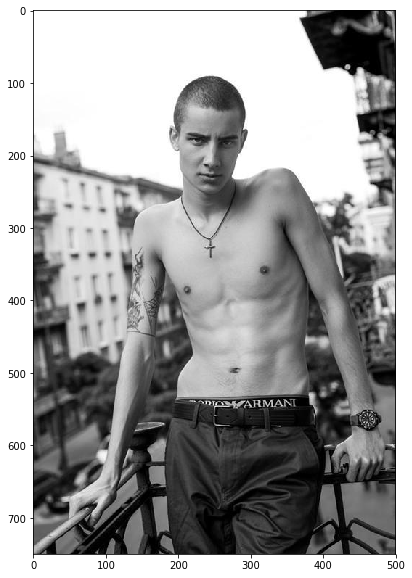

topwords of image  e957528e9ddc3be3a779879f6feb40d69951d5db.jpg
0 道路 0.538399|1 上身 0.521994|2 房里 0.407992|3 街道 0.407249|4 拎 0.404213|5 外 0.374281|6 和 0.36563|7 光 0.358075|8 短裤 0.350531|9 看着 0.345582|10 取款机 0.343923|11 熨 0.34187|12 草地 0.340212|13 波涛 0.336362|14 自行车 0.33392|15 他们 0.333245|16 背心 0.324887|17 大厅 0.321862|18 椅子 0.31261|19 背着 0.307457|20 叉腰 0.305538|21 伞 0.305495|22 草丛 0.30281|23 地下室 0.300792|24 插 0.298819|25 凳子 0.297408|26 挎着 0.293039|27 路边 0.292931|28 躺 0.289283|29 胸 0.287543|30 台阶 0.286177|31 辆 0.285744|32 拿球 0.2841|33 沙滩 0.284002|34 衣服 0.281804|35 植物 0.278479|36 饲养 0.277247|37 轮椅 0.276832|38 显 0.275792|39 彩灯 0.274725|40 消毒 0.272681|41 墨镜 0.272631|42 兜 0.270958|43 手拿碗 0.270071|44 床栏 0.269946|45 球衣 0.265097|46 简洁 0.26423|47 肩上 0.261143|48 泡脚 0.259652|49 长椅 0.257324|50 t 0.256741|51 阳光明媚 0.256492|52 眼镜 0.255906|53 跑步 0.255383|54 天空 0.254424|55 柱子 0.253088|56 茵 0.253082|57 左肩 0.252075|58 跪 0.250972|59 栏杆 0.249987|60 窗沿 0.249777|61 屋外 0.248652|62 油桶 0.247813|63 打拳 0.246492|64 

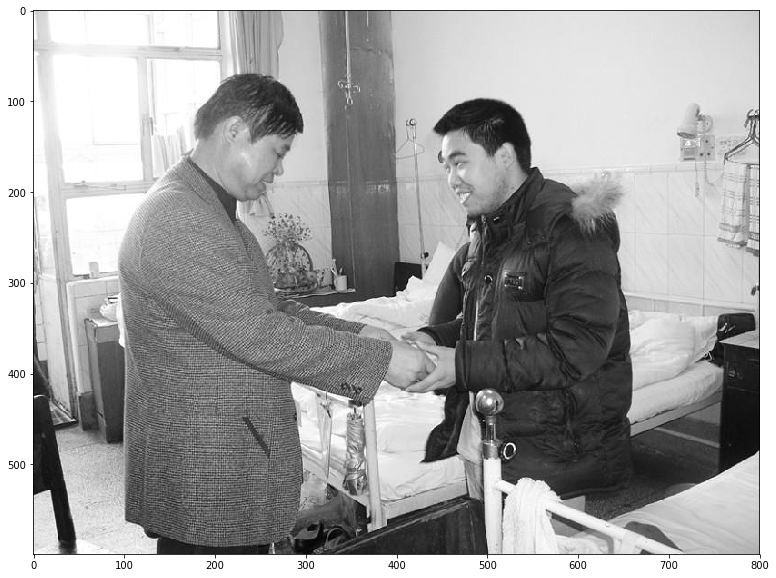

In [ ]:
case_file = '/home/gezi/mine/mount/temp/image-caption/ai-challenger/model.v5/case.txt'
for line in open(case_file):
  image_name = line.strip().split()[0]
  if not image_name.endswith('.jpg'):
    image_name += '.jpg'
  image_path = os.path.join(image_dir, image_name)

  IMAGE_SIZE = (14, 10)
  #plt.subplot(1, 1, 1)  
  plt.figure(figsize=IMAGE_SIZE)
  image_show(image_path)

  if not os.path.exists(image_path):
    print('path not exists:%s'%image_path)
    image_path = image_name
    if not os.path.exists(image_path):
      continue
  image = melt.read_image(image_path)

  scores, word_ids = predictor.top_words([image], 200)
  scores = scores[0]
  word_ids = word_ids[0]
  print('topwords of image ', image_name)
  i = 0
  for word_id, score in zip(word_ids, scores):
    print(i, vocab.key(int(word_id)), score, end='|')
    i += 1  

In [ ]:
while True:
  image_name = raw_input('image_file like 6275b5349168ac3fab6a493c509301d023cf39d3.jpg: ')
  image_name = image_name.strip().replace('file://', '')
  if image_name == 'q':
    break
  if not image_name.endswith('.jpg'):
    image_name += '.jpg'

  image_path = os.path.join(image_dir, image_name)

  if not os.path.exists(image_path):
    print('path not exists:%s'%image_path)
    image_path = image_name
    if not os.path.exists(image_path):
      continue
        
  # Size, in inches, of the output images.
  IMAGE_SIZE = (14, 10)
  #plt.subplot(1, 1, 1)  
  plt.figure(figsize=IMAGE_SIZE)
  image_show(image_path)

#   try:
#     hits = img2text[image_name]
#     texts = [text_strs[hit] for hit in hits]
#     for text in texts:
#       word_ids = text2ids.text2ids(text)
#       seg_text = text2ids.ids2text(word_ids, print_end=False)
#       print('label:', text, seg_text)
#       words_importance = predictor.words_importance([word_ids])
#       words_importance = words_importance[0]
#       for i in range(len(word_ids)):
#         if word_ids[i] == 0:
#           break 
#       print()
#   except Exception:
#     print(traceback.format_exc(), file=sys.stderr)    
#     pass

  image = melt.read_image(image_path)
  scores, word_ids = predictor.top_words([image], 200)
  scores = scores[0]
  word_ids = word_ids[0]
  print('topwords of image:')
  i = 0

  for word_id, score in zip(word_ids, scores):
    print(i, vocab.key(int(word_id)), score, end='|')
    i += 1

  while True:
    text = raw_input('text(q for exit): ')
    if text is 'q' or not text.strip():
      break
    text = text.replace(' ', '')
    print(text2ids.text2segtext(text))
    print('sim:', predictor.predict([image], [text2ids.text2ids(text)]))